e:\DATA\_Data_\EDU\StudiaElektryczny\SEM9\proj_badawczy\watermarking


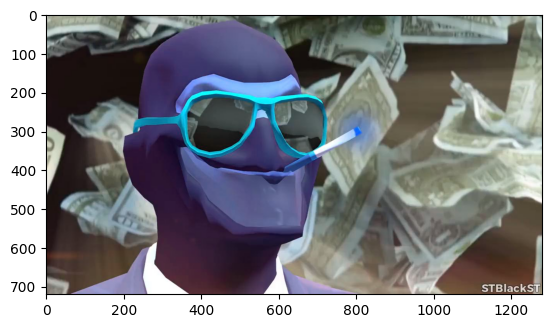

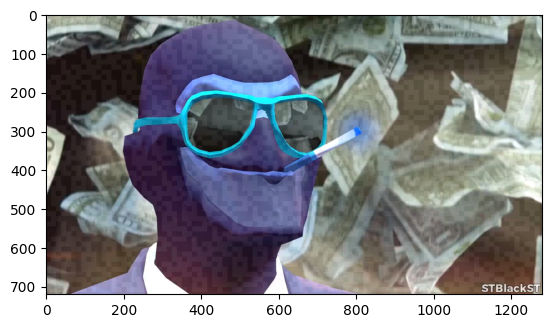

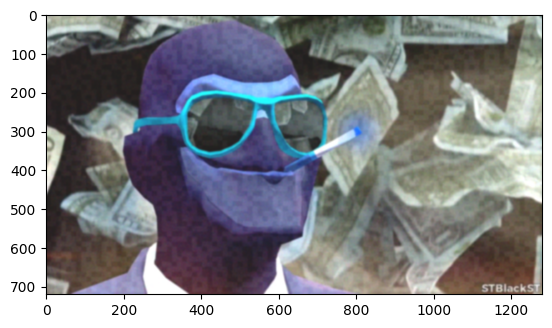

decoded_watermark: grani_to


In [25]:
import json
import sys
from pathlib import Path
from IPython.display import Image

import cv2
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


src_path = Path.cwd().parent
print(src_path)
sys.path.append(str(src_path))

import src.utils
from src.watermarkers.naive_watermarker import NaiveWatermarker

# watermark_bytes, scale  = "OwO".encode("utf-8"), 2
# img = src.utils.watermark_to_grayscale_image(watermark_bytes, (13, 28), scale)
# #print img info
# print("img shape", img.shape, "img dtype", img.dtype, "img min", img.min(), "img max", img.max())
# # convert img to int8 add +- std noise (std as noise type using np) and convert back to uint8
# img = img.astype(np.int32)
# img += np.random.normal(0, 221, img.shape).astype(np.int32)
# img = np.clip(img, 0, 255).astype(np.uint8)


# extracted_watermark = src.utils.grayscale_image_to_watermark(img, scale, len(watermark_bytes))
# print("decoded watermark", extracted_watermark)
# plt.imshow(img)
# plt.show()

# source_image = np.random.randint(0, 255, (113, 123, 3)).astype(np.uint8)
source_image = cv2.imread("C:/Users/Vectro/Downloads/money.jpg")
plt.imshow(source_image)
plt.show()
# source_image = np.zeros((113, 123, 3), dtype=np.uint8)
watermark = "grani_to"
w = NaiveWatermarker(0.05, 13, len(watermark))
encoded_img, _ = w.encode(source_image, watermark)
plt.imshow(encoded_img)
plt.show()
encoded_img = (encoded_img.astype(int) + np.random.randint(-50, 0, source_image.shape).astype(int)).clip(0, 255).astype(np.uint8)
encoded_img = cv2.GaussianBlur(encoded_img, (11, 11), 0)
# encoded_img = cv2.imdecode(cv2.imencode(".jpg", encoded_img , [int(cv2.IMWRITE_JPEG_QUALITY), 1])[1], cv2.IMREAD_COLOR)
encoded_img = (encoded_img.astype(int) + np.array([30, 30, 30])).clip(0, 255).astype(np.uint8)
plt.imshow(encoded_img)
plt.show()
decoded_watermark, _ = w.decode(encoded_img, source=source_image)
# assert watermark == decoded_watermark
print("decoded_watermark:", decoded_watermark)